# Innomatics Research Labs


# STEP 1: Problem Statement

# STEP 2: Import necessary libraries and dataset
#### Importing Libraries

In [378]:
# Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Scientific computation (for Statistics)
from scipy import stats

#To split the train and test data
from sklearn.model_selection import train_test_split

#Building a model
from sklearn.linear_model import LinearRegression

#Validating a model
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [379]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tangled-up-in-unicode==0.2.0 in c:\users\bhara\anaconda3\lib\site-packages (from pandas-profiling) (0.2.0)



In [380]:
from pandas_profiling import ProfileReport

### Load a Dataset


In [381]:
dataset = pd.read_csv(r"C:\Users\bhara\Downloads\dataframe_.csv")

# STEP 3: EDA (Data Exploration)
### Understanding about the data and insights of it

In [382]:
dataset.shape

(1697, 2)

This means that our dataset has 1697 rows and 2 columns. Let's take a look at what our dataset actually looks like. To do this, use the head() method:

In [383]:
dataset.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [384]:
len(dataset)

1697

In [385]:
dataset.tail()

,input,output
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052
1696,17.145296,-101.726894


In [386]:
#To see statistical details of the dataset
dataset.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [387]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [388]:
dataset.dtypes

input     float64
output    float64
dtype: object

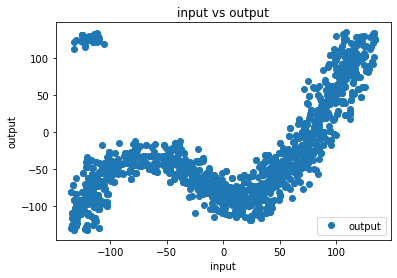

In [389]:
dataset.plot(x='input', y='output', style='o')
plt.title('input vs output')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

Data points on 2-D graph

In [390]:
corr = dataset.corr()
corr

,input,output
input,1.000000,0.511776
output,0.511776,1.000000


<AxesSubplot:>

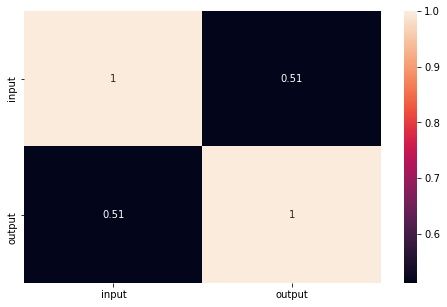

In [391]:
plt.subplots(figsize=(8,5))
sns.heatmap(corr, annot=True)


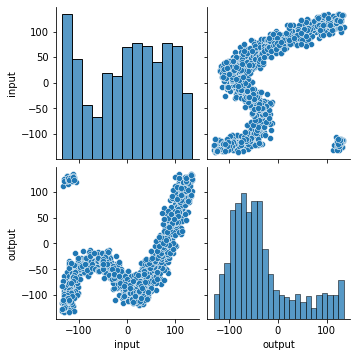

In [392]:
import seaborn as sns
sns.pairplot(dataset)

Text(0, 0.5, 'output')

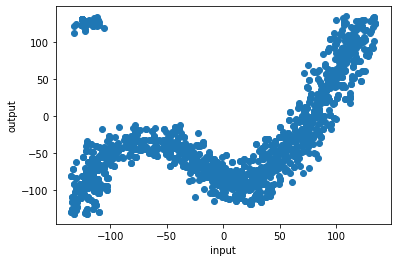

In [393]:
plt.scatter(dataset['input'],dataset['output'])
plt.xlabel("input")
plt.ylabel("output")

<AxesSubplot:xlabel='input', ylabel='output'>

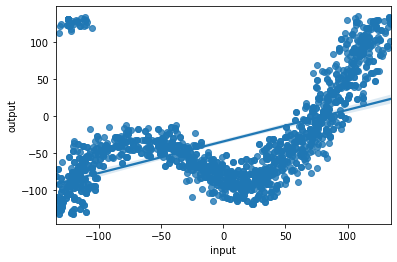

In [394]:
sns.regplot(x="input",y="output",data=dataset)

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

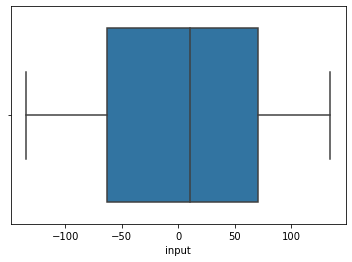

In [395]:
sns.boxplot(dataset['input'])

In [396]:
ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# STEP 4: Data preparation
### Checking the Missing values

In [397]:
dataset.isnull().sum()

input     1
output    1
dtype: int64

In [398]:
dataset.columns[dataset.isnull().any()]


Index(['input', 'output'], dtype='object')

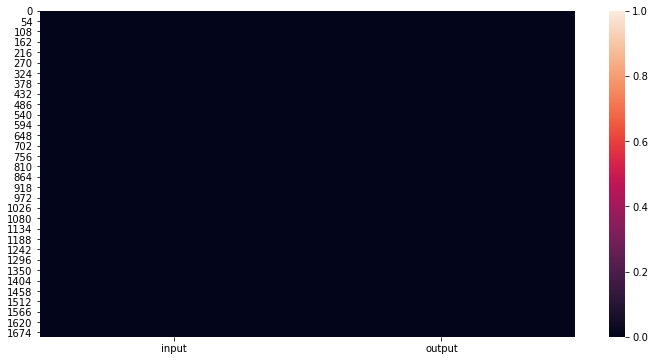

In [399]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.isnull())
plt.show()

In [400]:
dataset = dataset.dropna()

In [401]:
dataset.isnull().sum()

input     0
output    0
dtype: int64

**Dividing the dataset into independent and dependent variable**
The next step is to divide the data into **"attributes" and "labels".**

- Attributes are the independent variables while labels are dependent variables whose values are to be predicted.
- In our dataset we only have two columns.
 - We want to predict the output.
 - Therefore our attribute set will consist of the **input** column, and the label will be the **output** column.

In [402]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 1]

In [403]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [404]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


The above script splits 80% of the data to training set while 20% of the data to test set. The
test_size variable is where we actually specify the proportion of test set.

In [405]:
X_train

array([[-122.8894421 ],
       [   9.62685923],
       [ -68.3758247 ],
       ...,
       [   3.6333313 ],
       [  69.6333313 ],
       [ -27.8216707 ]])

In [406]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1356, 1)
(340, 1)
(1356,)
(340,)


## **STEP 5**: Building a model using training data

### Linear regression

In [407]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Import the LinearRegression class, instantiate it, and call the fit() method along with our training
data.

In the theory section we said that linear regression model basically finds the best value for the
intercept and slope, which results in a line that best fits the data. To see the value of the
intercept and slop calculated by the linear regression algorithm for our dataset

In [408]:
print(regressor.intercept_)

-34.7863894874291


In [409]:
print(regressor.coef_)


[0.41178959]


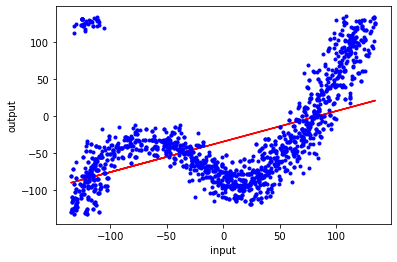

In [410]:
plt.plot(X_train, regressor.predict(X_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("input")
plt.ylabel("output")
plt.show()

In [411]:
y_pred = regressor.predict(X_test)

In [412]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.30039433565890894


In [413]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.29832449641529624

In [414]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 43.89558011440079
Mean Squared Error: 3291.4050360956
Root Mean Squared Error: 57.37076813234768


### Polynomial Regression

In [415]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [416]:
# Predict Result with Polynomial Regression
X_test = X_test.reshape(-1, 1)
y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
y_pred

array([ -8.68992016, -50.21382435, -34.023281  , -49.74153   ,
       -77.91295295, -75.54223814, -33.03512049,  25.802175  ,
       -68.66245521, -76.76954766, -49.39090236, -28.66193982,
       -60.10951247,  -6.46254586,  89.78274805, -66.21445965,
       -27.56183592, -56.59139552, -81.54110324, -57.32792636,
       -93.47912946,  80.13512631, 103.33624348, -75.54223814,
       133.76258497, -79.93833108,  55.51647769, -31.62933691,
       -77.12527934,  29.84338278, -77.31317596, -40.75703029,
       -82.66115991, -69.42196755, -56.79647423, -39.15429414,
        98.03684254, -65.93020593,  69.28847554, -82.52064055,
       -41.72127138, -64.87937276, -79.4959564 , -81.80393936,
        33.04469545, -79.9790063 , -82.15614718, -75.37090984,
       -39.61707052, -91.04372174, -56.05588388, -44.20203563,
       -31.27933842, -68.10516204,  -7.09113861, -66.51772627,
       -59.94798369,  20.168906  , -74.58304579,  91.79616962,
         5.75728867, -46.22914277, -80.56484492,  55.97

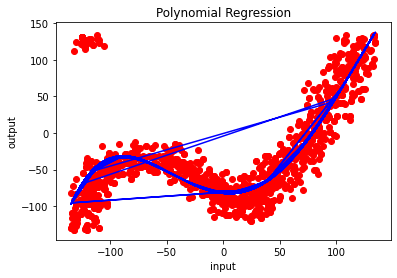

In [417]:
# Visualise the Results of Polynomial Regression
plt.scatter(X_train.reshape(-1, 1), y_train, color = "red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('input')
plt.ylabel("output")
plt.show()

In [418]:
lin_reg_2.predict(poly_reg.fit_transform(X))

array([-63.63948127, -61.07463153, -97.1098349 , ..., -72.56224039,
       -74.48163324, -80.78345988])

In [419]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7272995587081279


In [420]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7264927526688028

In [421]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 22.167439378091544
Mean Squared Error: 1282.9621764982644
Root Mean Squared Error: 35.818461392112646


### Conclusion

Polynomial Regression has better accuracy than linear regression that is Polynomial regression r squared=72% Linear regression r- squared=30%